# BA780: Introduction to Data Analytics
# Team Project
**Team 8:**
* Jacinto Lemarroy
* Yongxian (Caroline) Lun
* Yipeng (Caroline) Guo
* Chris Chang
* Aash Gohil

***

**Dataset:** 
    HR Analytics: Job Change in Data Scientists
    
 (*Data source from Analytics Vidhya: https://datahack.analyticsvidhya.com/contest/janatahack-hr-analytics/True/#DiscussTab*)

  The dataset is from JanataHack (Machine Learning Hackathon), a knowledge competition on Machine Learning & Data Science. It's powered by Analytics Vidhya Community, a data science community. 


**Background:**
    A company which is active in Big Data and Data Science wants to hire data scientists among people who received training. "Company" wants to analyze the factors affecting candiates' decision on staying or looking for a new job after training. 

**Objective:**
    The project goal is to predict whether a data scientist candidate will look for a new employment or wants to work for the company after training, which helps optimize HR costs and increase efficiencies. By using both descriptive and predictive analysis on a company’s HR dataset, we seek to interpret affecting factors on employee decisions. 

# Summary of the Dataset

To explore the factors that influence the employee decision, we chose to narrow the features of our dataset to the following 13 variables:

12,477 rows and 13 features

* enrollee_id : Unique ID for candidate 
-city_ development _index : Developement index of the city (scaled)
-gender: Gender of candidate
-relevent_experience: Relevant experience of candidate
-enrolled_university: Type of University course enrolled if any
-education_level: Education level of candidate
-major_discipline :Education major discipline of candidate
-experience: Candidate total experience in years
-company_size: No of employees in current employer's company
-company_type : Type of current employer
-lastnewjob: Difference in years between previous job and current job
-training_hours: training hours completed
-target: 0 – Stay in the "Company" after Training, 1 – Looking for a New job after Training


Data preparationg for ML 

To get dummies:
* gender->0,1, 
* experience->0~21, 
* relevent_experience: 0,1 binary 
* enrolled_university: get dummy, 3 columns
* education_level: get dummy, 3 columns
* major_discipline: 0,1 STEM, NOT STEM
* company_size: small, large, medium, unknown 
* company_type: Unknown, startupGroup, Private, public, NGO, other
* lastnewjob-> turn into integer: 0,1,2,3,4,5; 

# 1. Data Cleaning and Processing

## 1.1 Null Value Reasoning

In [ ]:
pip install squarify

In [ ]:
pip install circlify

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import squarify

In [ ]:
# Importing Data
df = pd.read_csv('https://raw.githubusercontent.com/aashgohil/HR_Data_Science/main/aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target,company_size
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1,36,1.0,Unknown
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,>4,47,0.0,Small Company


In [ ]:
# Bucketing the company_size values into categorizes
df['size'] = np.where(df['company_size'].isin(['50-99','10-49','<10']), 'Small Company', 'Unknown')
df['size'] = np.where(df['company_size'].isin(['100-500','500-999']), 'Medium Company',df['size'])
df['size'] = np.where(df['company_size'].isin(['10000+','1000-4999','5000-9999']), 'Large Company',df['size'])
sorted_counts=df['size'].value_counts()

In [ ]:
sorted_counts

Unknown           7409
Small Company     4391
Large Company     3910
Medium Company    3448
Name: size, dtype: int64

In [ ]:
df.drop(['company_size'], axis=1, inplace=True)
df.rename(columns={'size': 'company_size'}, inplace=True)

In [ ]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_type              6140
last_new_job               423
training_hours               0
target                       0
company_size                 0
dtype: int64

Thera are quite a few features with null values. We will investigate if null values have a significant impact on attrition, by encoding null with "Unknown". We will drop the null values for features where the ratio of attrition for null values is similar to that of non null values. On the contrary, we will keep  null values as "Unknown" for features where null values seems to have a significant impact on attrition .

In [ ]:
df_temp = df.fillna('Unknown')

In [ ]:
## This function takes in a list of features and plots a count plot against the target variable
def plotsa1(category):

  for cat in category:
    plt.figure(figsize=(10,7))
    ax = sns.countplot(x=cat, hue='target', data=df_temp)
    plt.title(cat + ' vs Target')

    plt.show()

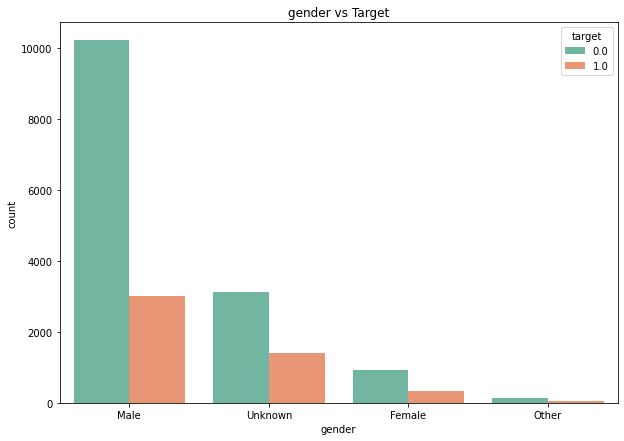

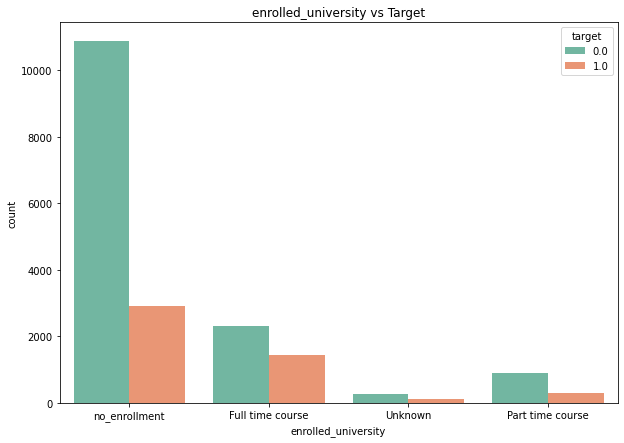

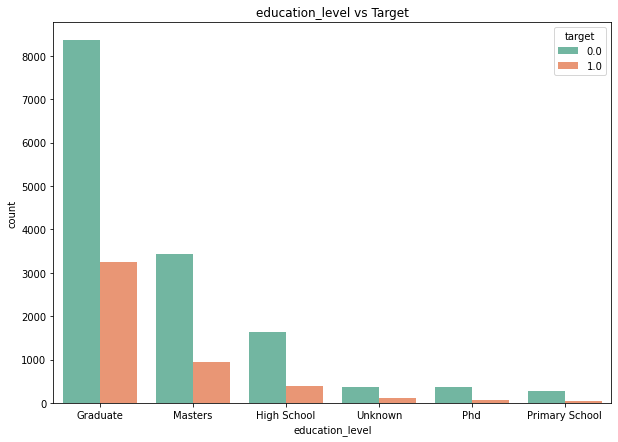

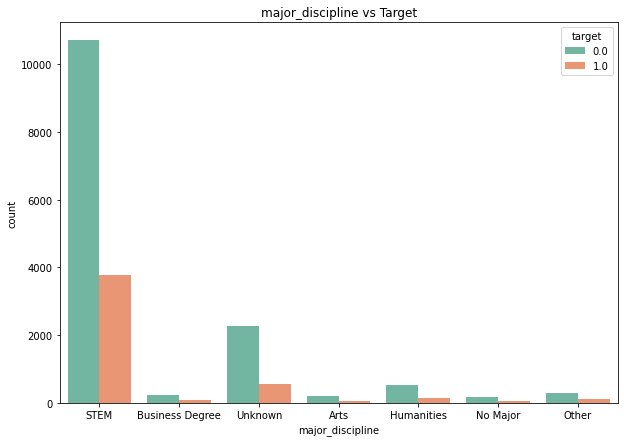

In [ ]:
plotsa1(['gender','enrolled_university','education_level','major_discipline'])

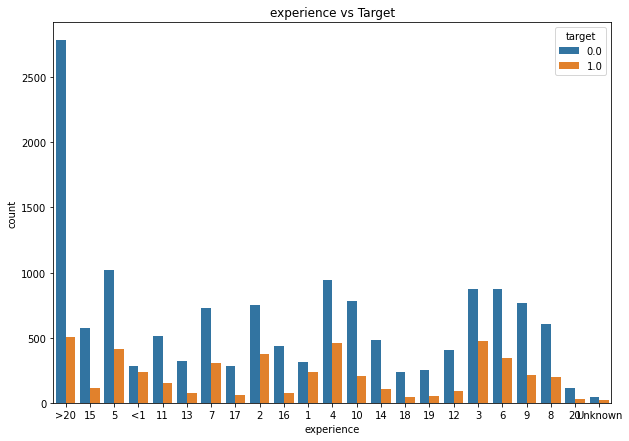

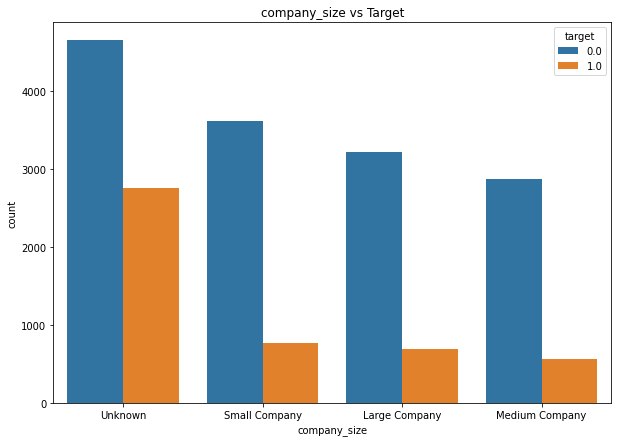

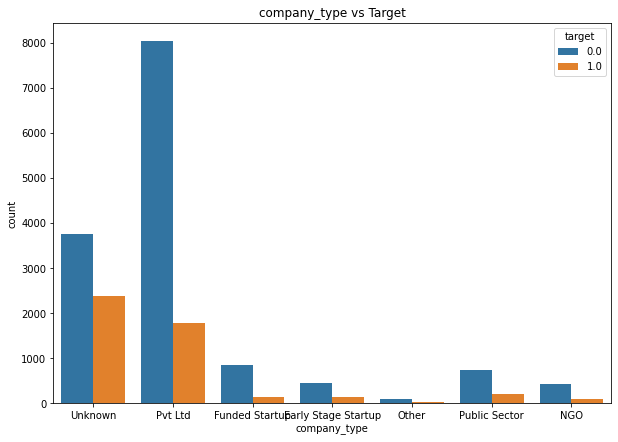

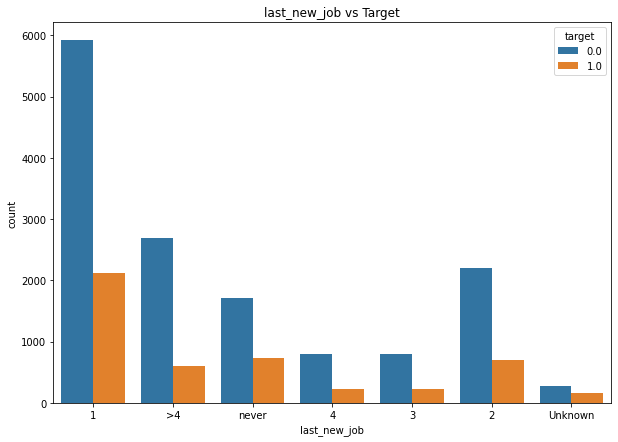

In [ ]:
plotsa1(['experience','company_size','company_type','last_new_job'])

From the graphs above we can conclude, only for the variables company_size and company_type does the unknown value play an impact.

## 1.2 Data Cleaning
Drop the null observations in specific columns: 
* gender
* relevent_experience
* enrolled_university
* education_level
* major_discipline
* experience
* lastnewjob

In [ ]:
# dropping null observations in specified columns and filling null values with "Unknown"
df_Clean = df.dropna(subset = ['gender','enrolled_university','education_level','major_discipline','experience','last_new_job'])
df_Clean = df_Clean.fillna('Unknown')
df_Clean['company_size'].replace({'10/49':'10-49'}, inplace=True)

In [ ]:

df_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12477 non-null  int64  
 1   city                    12477 non-null  object 
 2   city_development_index  12477 non-null  float64
 3   gender                  12477 non-null  object 
 4   relevent_experience     12477 non-null  object 
 5   enrolled_university     12477 non-null  object 
 6   education_level         12477 non-null  object 
 7   major_discipline        12477 non-null  object 
 8   experience              12477 non-null  object 
 9   company_type            12477 non-null  object 
 10  last_new_job            12477 non-null  object 
 11  training_hours          12477 non-null  int64  
 12  target                  12477 non-null  float64
 13  company_size            12477 non-null  object 
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
df_Clean.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              0
last_new_job              0
training_hours            0
target                    0
company_size              0
dtype: int64

In [ ]:
# Changing name of column to make it more interpretable to reader of notebook; Graduate means undergraduate
df_Clean['education_level'].replace({'Graduate':'Undergraduate'}, inplace=True)

# 2. Exploratory Data Analysis 



## 1. Demographics:
    1. Gender
    2. City (city, CDI)
    3. Education (major_discipline, enrolled_university, education_level)
    4. Job history (experience, relevent_experience, last_new_job)

### 1.1 Gender
#### 1.1.1 Is the hiring of data scientists gender biased? What is the impact of gender on attrition?

In [ ]:
## Function to create pie plot, takes input as list of features and dataframe
def pie_plt(category, dataframe):    

  for cat in category:
    values_m = dataframe[cat].value_counts()
    labels_m = values_m.index
    plt.subplots(figsize = (9,7))

    plt.pie(values_m, labels=labels_m,  wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
        ,explode=(0.1, 0.1, 0.1,0.1), autopct='%0.2f%%')
    plt.title('Hiring of Data Scientist by Gender at Company')
    plt.show()

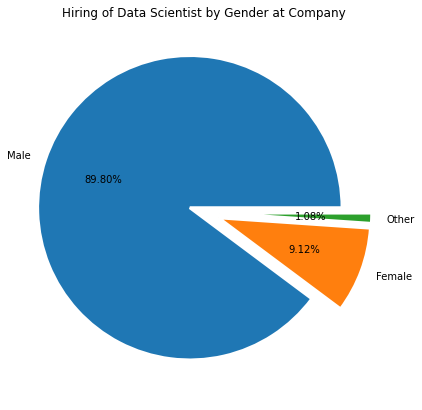

In [ ]:
## PLotting a pie chart for hiring of DS by gender
pie_plt(['gender'], df_Clean)

Approximately 90% of the hires are male, demonstrating a bias in the hiring of DS at this company. The industry average of male DS in USA is 65% according to the below source.

https://www.zippia.com/data-scientist-jobs/demographics/

In [ ]:
## This function takes in a list of features and plots a normalized count plot against the target variable
def norm_cnt_plt(category, dataframe):  
  for cat in category:
    plt.figure(figsize=(10,8))
    x,y = cat, 'target'
    df1 = dataframe.groupby(x)[y].value_counts(normalize=True) # Grouping by feature, and target variable, then normalizing it
    df1 = df1.mul(100) 
    df1 = df1.rename('percent').reset_index()

    ax =  sns.catplot(x=x,y='percent',hue=y, kind='bar',data=df1)  # Plotting the graph
    plt.xticks(rotation= 45)
    plt.title(cat + ' vs Target')
    plt.show()

<Figure size 720x576 with 0 Axes>

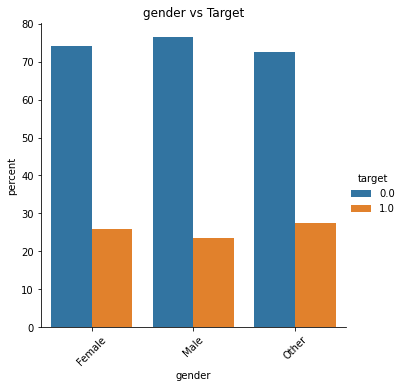

In [ ]:
## Checking the impact of attrition on gender using a normalized bar plot.
norm_cnt_plt(['gender'], df_Clean)


From the above graph gender seems to have no impact on 

attrition.

### 1.2 City

CDI is ranked on a scale from 0 to 1.0, with 1.0 being the highest human development. HDI is broken down into four tiers: very high human development (0.8-1.0), high human development (0.7-0.79), medium human development (0.55-.70), and low human development (below 0.55).

In [ ]:
## Creating categorical values from CDI
cdi_bins = [0, 0.55, 0.70, 0.79, 1.0]
cdi_labels = ["low_human_development","medium_human_development","high_human_development","very_high_human_development"]
df_Clean['cdi_bucket'] = pd.cut(df_Clean['city_development_index'], bins = cdi_bins, labels = cdi_labels)

In [ ]:
df_Clean.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target,company_size,cdi_bucket
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,>20,Unknown,1,36,1.0,Unknown,very_high_human_development
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Undergraduate,STEM,15,Pvt Ltd,>4,47,0.0,Small Company,high_human_development
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,4,8,0.0,Small Company,high_human_development
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,13,Pvt Ltd,>4,18,1.0,Small Company,high_human_development
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,7,Pvt Ltd,1,46,1.0,Small Company,very_high_human_development
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,5,Pvt Ltd,1,108,0.0,Large Company,very_high_human_development
12,25619,city_61,0.913,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,>20,Pvt Ltd,3,23,0.0,Large Company,very_high_human_development
15,6588,city_114,0.926,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,16,Pvt Ltd,>4,18,0.0,Unknown,very_high_human_development
19,11399,city_13,0.827,Female,Has relevent experience,no_enrollment,Undergraduate,Arts,4,Unknown,1,132,1.0,Unknown,very_high_human_development
20,31972,city_159,0.843,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Pvt Ltd,1,68,0.0,Medium Company,very_high_human_development


#### 1.2.1 Which are the top 10 cities the company hires from? and their corresponding CDI. (the higher the CDI, the more urban the city is)

In [ ]:
df_Clean.groupby(['city','city_development_index','cdi_bucket'], as_index= False)['enrollee_id'].count()   \
                  .sort_values(by = 'enrollee_id',ascending = False).head(10).reset_index(drop = True).rename(columns={"enrollee_id": "count"})

,city,city_development_index,cdi_bucket,count
0,city_103,0.920,very_high_human_development,3262
1,city_21,0.624,medium_human_development,1480
2,city_16,0.910,very_high_human_development,1093
3,city_114,0.926,very_high_human_development,801
4,city_160,0.920,very_high_human_development,619
5,city_136,0.897,very_high_human_development,405
6,city_67,0.855,very_high_human_development,277
7,city_75,0.939,very_high_human_development,218
8,city_104,0.924,very_high_human_development,190
9,city_102,0.804,very_high_human_development,190


Company hires mainly from very high human development cities, with majority of the candidates coming from city_103. The only exception is city_21 which is the 2nd highest in terms of hiring but has medium CDI, it can be possible this is a University Town.

#### 1.2.2 How is CDI correlated with an individual’s education level?

In [ ]:
## Since CDI is a numeric variable and Education level is categorical, we use ANOVA to calculate correlation
df_cdi_edu = df_Clean[['education_level','city_development_index']]

In [ ]:
# f_oneway() function takes the df_cdi_edu as input and returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between City Development Index and Education Level
# Assumption(H0) is that City Development Index and Education level are NOT correlated
 
# Finds out the CDI data for each education level as a list
CategoryGroupLists = df_cdi_edu.groupby('education_level')['city_development_index'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  2.8604593860651103e-18


Since the P-value is less than 0.05, we can reject the null H0, and conclude there is a correlation between CDI and education level



Citation : https://thinkingneuron.com/how-to-measure-the-correlation-between-a-numeric-and-a-categorical-variable-in-python/

<Figure size 792x720 with 0 Axes>

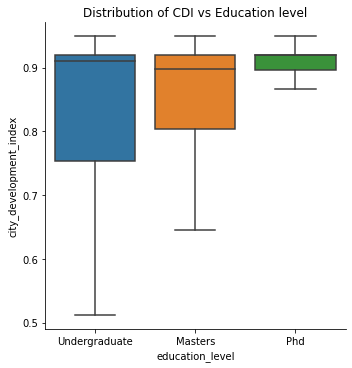

In [ ]:
## Plottting a Boxplot to check the distribution 
plt.figure(figsize=(11,10))
sns.catplot(x="education_level", y="city_development_index", kind="box", data=df_cdi_edu, showfliers = False).set(title='Distribution of CDI vs Education level');

In general, the candidates with higher qualifications belong to cities with higher CDI.

#### 1.2.3 Relationship between CDI and city code

In [ ]:
df_Clean.groupby('cdi_bucket', as_index=False)['city'].nunique().rename(columns={'city':'Number of cities'})   \
                .sort_values(by = 'Number of cities', ascending = False).reset_index(drop=True)

,cdi_bucket,Number of cities
0,very_high_human_development,47
1,medium_human_development,36
2,high_human_development,28
3,low_human_development,9


<Figure size 936x720 with 0 Axes>

<Figure size 720x576 with 0 Axes>

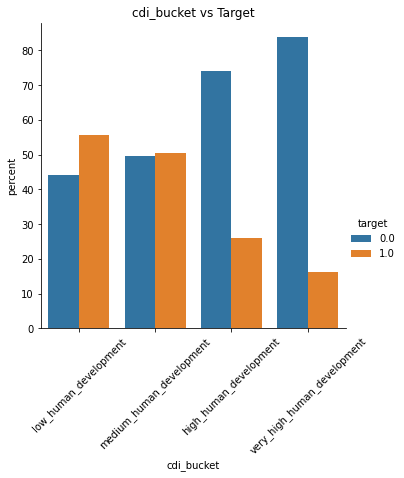

In [ ]:
### Impact of CDI on attrition  using a normalized bar plot.
plt.figure(figsize=(13,10))
norm_cnt_plt(['cdi_bucket'], df_Clean)


Candidates from cities with lower and medium development index are more likely to look for a change.

### 1.3 Education

#### 1.3.1 What are the top 5 education backgrounds for the data scientist (based on major discipline)

In [ ]:
df_Clean.education_level.unique()

array(['Undergraduate', 'Masters', 'Phd'], dtype=object)

In [ ]:
# import the circlify library
import circlify
values_e = df_Clean["education_level"].value_counts().sort_values(ascending=False)
labels_e = df_Clean["education_level"].value_counts().sort_values(ascending=True).index
# compute circle positions:
circles = circlify.circlify(
    values_e.tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

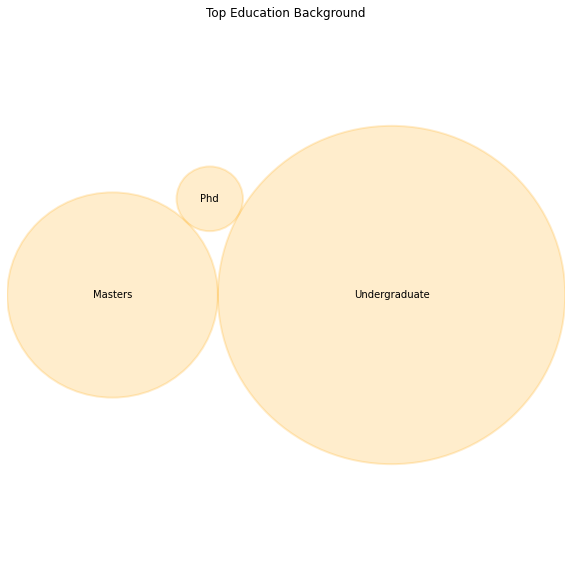

In [ ]:
# circular packing
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Top Education Background')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = labels_e

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, color="orange", linewidth=2))
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )


The candidates mostly have undergraduate education background, and small portion of the candidates has Phd. 

* Citation: https://www.python-graph-gallery.com/circular-packing-several-levels-of-hierarchy

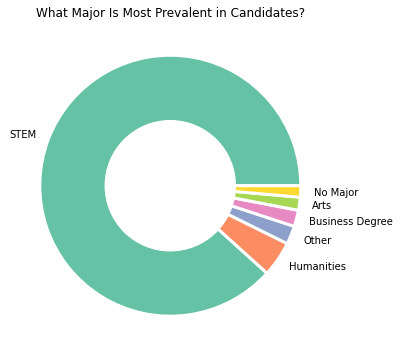

In [ ]:
# donut chart 
# create data
plt.figure(figsize=(8,6))
values_m = df_Clean["major_discipline"].value_counts()
labels_m = values_m.index
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.5, color='white')

# Custom wedges
plt.pie(values_m, labels=labels_m, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("What Major Is Most Prevalent in Candidates?")
plt.show()

Most of the enrollees major in STEM, which is reasonable because the company is hiring data scientists. 

#### 1.3.2 What are some education characteristics for those candidates who are staying?

In [ ]:
df_education = df_Clean[["target","enrolled_university", "major_discipline"]]

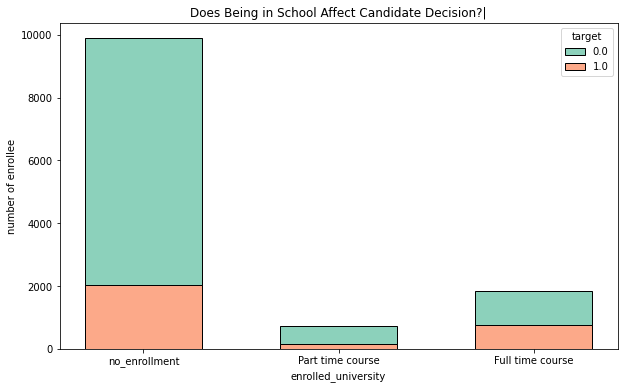

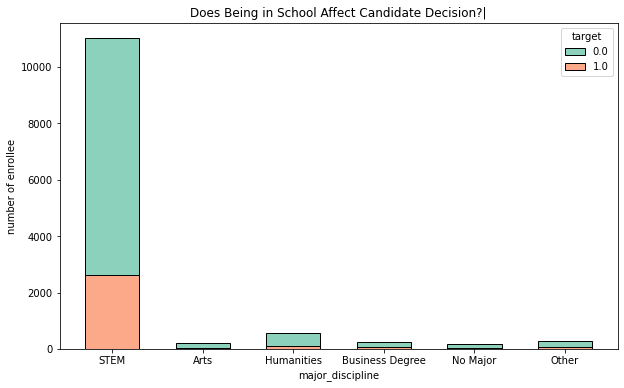

In [ ]:
for i in df_education.drop("target",axis=1):
  plt.figure(figsize=[10,6])
  hue_colors = {0:"red",1:"black"}   
  plots = sns.histplot(data = df_Clean,x=i,hue="target", multiple="stack", shrink = 0.6)
  # Iterrating over the bars one-by-one
  # for bar in plots.patches: 
  #   # Using Matplotlib's annotate function and
  #   # passing the coordinates where the annotation shall be done
  #   # x-coordinate: bar.get_x() + bar.get_width() / 2
  #   # y-coordinate: bar.get_height()
  #   # free space to be left to make graph pleasing: (0, 8)
  #   # ha and va stand for the horizontal and vertical alignment
  #     plots.annotate(format(bar.get_height(), '.2f'),
  #                   (bar.get_x() + bar.get_width() / 2,
  #                     bar.get_height()), ha='center', va='center',
  #                   size=10, xytext=(0, 8),
  #                   textcoords='offset points')

  plt.xlabel(i)
  plt.ylabel("number of enrollee")
  plt.title("Does Being in School Affect Candidate Decision?|")
  plt.show()

In [ ]:
test1 = df_Clean.groupby(["education_level", "target"])["target"].count()

In [ ]:
test1

education_level  target
Masters          0.0       2643
                 1.0        626
Phd              0.0        282
                 1.0         43
Undergraduate    0.0       6586
                 1.0       2297
Name: target, dtype: int64

In [ ]:
test1 = test1.reset_index(name='count')

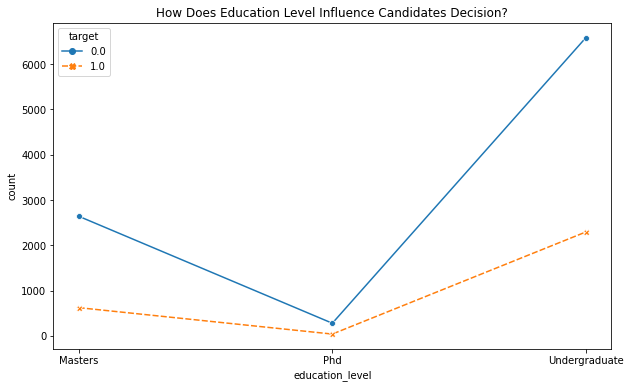

In [ ]:
plt.figure(figsize=[10,6])
sns.lineplot(data=test1,x="education_level", y = "count", hue="target", style="target",markers=True)
plt.title("How Does Education Level Influence Candidates Decision?");

* Master candidates who decide to stay have larger portion. 
* Candidates who have no enrollment or enroll in part-time course tend to stay in the company. 
* STEM majored candidates have higher chance to stay.

 



### 1.4 Job History

#### 1.4.1 No Gap/Yes Gap: will the gap years of jobs affect whether a candidate is staying or leaving?

In [ ]:
# First see the portion of the duration of job gap
ep = df_Clean['last_new_job'].value_counts().reset_index()
ep.columns = [
    'last_new_job', 
    'percent'
]
ep['percent'] /= len(df)
fig = px.pie(
    ep, 
    names='last_new_job', 
    values='percent', 
    title='Difference in Years Between Previous Job and Current Job', 
    width=800,
    height=500 
)
fig.show()

In [ ]:
last_graph = df_Clean.groupby(["last_new_job", "target"])["target"].count()

In [ ]:
last_graph = last_graph.reset_index(name='count')

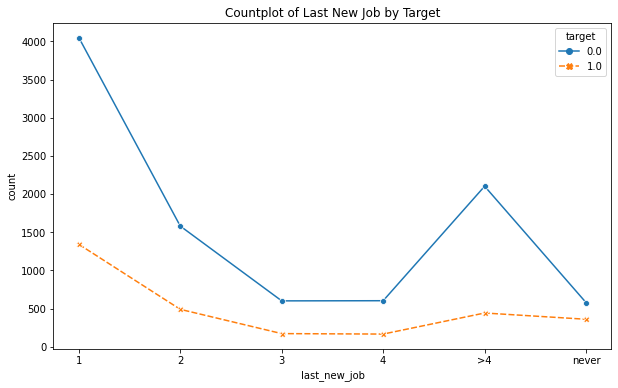

In [ ]:
plt.figure(figsize=[10,6])
sns.lineplot(data=last_graph,x="last_new_job", y = "count", hue="target", style="target",markers=True)
plt.title("Countplot of Last New Job by Target");

According to the above plot, we can easily tell that when the gap year(s) between last and new is(are) 1 or 2, the ratio between leave and stay is 1:3. When the gap duration increases to 3, 4 or even more than 4, the ratio of leave and stay decreases to 1:4. This means if the last job and new job gap turns longer, more candidates tend to stay in this Big Data company correspondingly.

However, when we come to candidates never change their job -- the 'never' group, we can see that the ratio between leave and stay are 1:2, which means least candidates in this group will stay in this company rather than their original ones.

This will give HR a hint: When recruiting candidates to join this program, we can turn to candidates with longer gap beween last job and new one. However, not the ones who never change their job, those may experience nostalgia and don't want any change.

#### 1.4.2 Is the hiring of Data Scientists impacted by their previous experience? 

In [ ]:
# Set bins for experience to make the graph clearer
df_Clean['cat_experience'] = np.where(df_Clean['experience'].isin(['<1','1','2','3','4','5']), 'Primary Experience',df_Clean['experience'])
df_Clean['cat_experience'] = np.where(df_Clean['experience'].isin(['6','7','8','9','10']), 'Little Experience',df_Clean['cat_experience'])
df_Clean['cat_experience'] = np.where(df_Clean['experience'].isin(['11','12','13','14','15']), 'Have Experience',df_Clean['cat_experience'])
df_Clean['cat_experience'] = np.where(df_Clean['experience'].isin(['16','17','18','19','20','>20']), 'Many Experience',df_Clean['cat_experience'])

In [ ]:
# First see the portion of experiecne
ep = df_Clean['cat_experience'].value_counts().reset_index()
ep.columns = [
    'cat_experience', 
    'percent'
]
ep['percent'] /= len(df_Clean)

fig = px.pie(
    ep, 
    names='cat_experience', 
    values='percent', 
    title='What Level of Experience do Most Candidates Have?', 
    width=800,
    height=500 
)

fig.show()

In [ ]:
exp_graph = df_Clean.groupby(["cat_experience", "target"])["target"].count()

In [ ]:
exp_graph = exp_graph.reset_index(name='count')

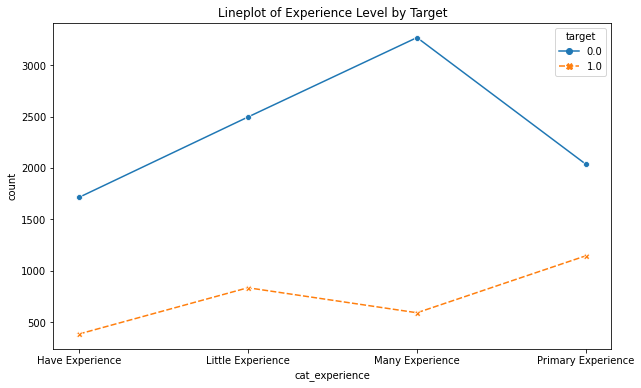

In [ ]:
plt.figure(figsize=[10,6])
sns.lineplot(data=exp_graph,x="cat_experience", y = "count", hue="target", style="target",markers=True)
plt.title("Lineplot of Experience Level by Target");

From the graph, we can easily tell that in the group with more experience  candidates tend to stay in Big Data company after training. And this trend is monotonical.

This gives HR the hint -- Candidates with more experience joining this program will tend to stay.

#### 1.4.3 Does the type of the candidate's current company affect his decision? 

In [ ]:
com_graph = df_Clean.groupby(["company_type", "target"])["target"].count()

In [ ]:
com_graph

company_type         target
Early Stage Startup  0.0        307
                     1.0         79
Funded Startup       0.0        677
                     1.0        108
NGO                  0.0        313
                     1.0         59
Other                0.0         60
                     1.0         17
Public Sector        0.0        518
                     1.0        128
Pvt Ltd              0.0       5789
                     1.0       1183
Unknown              0.0       1847
                     1.0       1392
Name: target, dtype: int64

In [ ]:
com_graph = com_graph.reset_index(name='count')

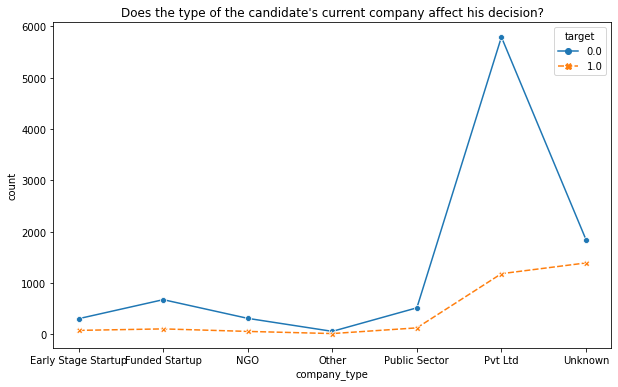

In [ ]:
plt.figure(figsize=[10,6])
sns.lineplot(data=com_graph,x="company_type", y = "count", hue="target", style="target",markers=True)
plt.title("Does the type of the candidate's current company affect his decision?");

It seems like candidates from private companies tend to stay with the "company" after training. However, 75% of the candidates come from private companies. We need to further investigate into why most data scientist candidates come from a private company. Is there a reason? Perhaps "company" should focus its efforts into targeting only that company type. We could isolate those who come from pvt ltd.

#### 1.4.4 Does the size of the candidate's current company affect his decision? 

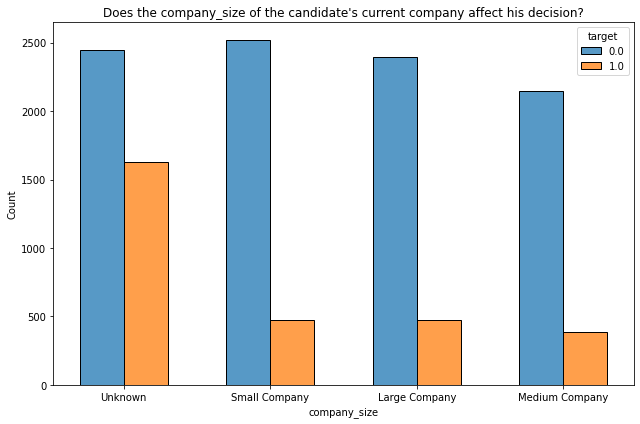

In [ ]:
plt.figure(figsize=[9,6])
sns.histplot(data = df_Clean,x="company_size",hue="target", multiple="dodge", shrink = 0.6)
plt.title("Does the {} of the candidate's current company affect his decision?".format("company_size"))

plt.tight_layout()
plt.show()

When comparing the sizes of the candidates' current companies, the candidates coming from small companies tend to stay with the "company" the most. However, there is not a clear relationship between the company size and the candidate's decision to stay after training.

#### 1.4.5 What type of company do most company hires come from?

In [ ]:
fig = px.pie(df_Clean['company_type'].value_counts(), values='company_type', 
             names = df_Clean['company_type'].value_counts().index,title = 'What is the most prevalent company type in the dataset?'
            )
fig.show()

Most candidates come from private limited companies.

#### 1.4.6 What company size do most candidates come from?

In [ ]:
fig = px.pie(df_Clean['company_size'].value_counts(), values='company_size', 
             names = df_Clean['company_size'].value_counts().index,title = 'What is the most prevalent company size in the dataset?'
             )
fig.show()

Not a clear winner; hires come from different size companies.

## 2. Engagement and Retention

### 2.1 How much training hours does the company invest in its future employees?

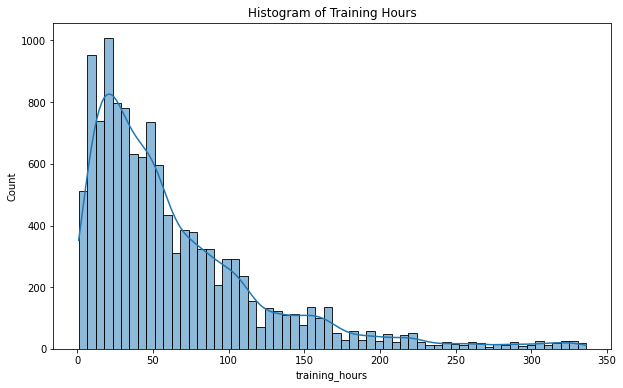

In [ ]:
# We can plot a histogram of training hours
plt.figure(figsize=[10,6])
sns.histplot(data=df_Clean, x="training_hours", kde=True)
plt.title("Histogram of Training Hours");

In [ ]:
df_Clean['training_hours'].median()

47.0

In [ ]:
df_Clean['training_hours'].describe()

count    12477.000000
mean        64.927306
std         59.732622
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

Distribution is right skewed. On average, the company spends approximately 47 hours training its future employees.

#### 2.1.1 Will candidates enrolled in university experience longer or shorter training hours?

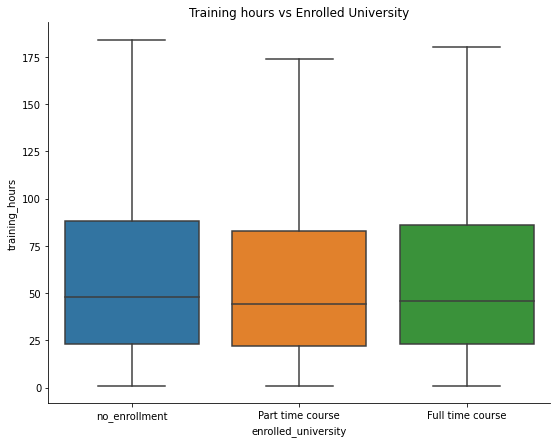

In [ ]:
plt.figure(figsize=[9,7])
sns.boxplot(x="enrolled_university", y="training_hours",
                 data= df_Clean,  showfliers = False)
sns.despine()
plt.title("Training hours vs Enrolled University");

The distribution is quite similar for all three enrolled university categories. However, the no enrollment category seems to have slightly higher training hours compared to those of the other two. This makes sense as people who are not enrolled in university may have more time for training. 

#### 2.1.2 Does company size/type affect the number of training hours? 

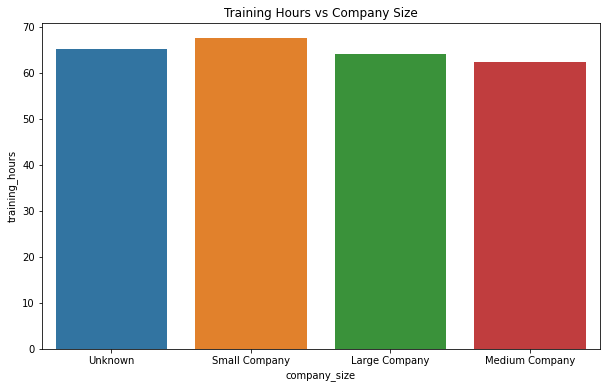

In [ ]:
plt.figure(figsize=[10,6])

sns.barplot(x="company_size", y="training_hours", data=df_Clean, ci=None)
plt.title("Training Hours vs Company Size");

Small company tends to have higher training hours compared to the others, which makes sense considering the fact that people from smaller companies may not have as much experience compared to people from larger and more established companies, and thus would required more training hours. 

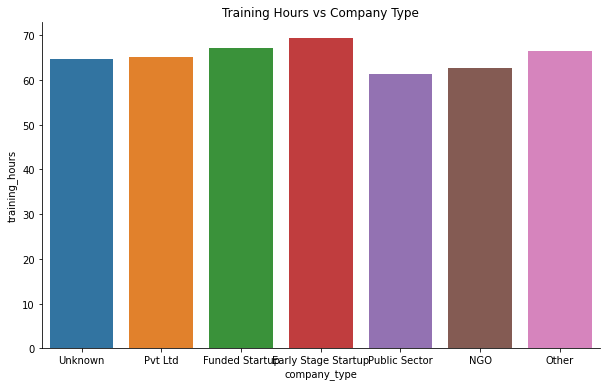

In [ ]:
plt.figure(figsize=[10,6])

sns.barplot(x="company_type", y="training_hours",
                 data= df_Clean, ci = None)
sns.despine()
plt.title("Training Hours vs Company Type");

Startups have highest training hours, followed by Pvt Ltd and NGO, and public sector has lowest training hours. People from startups may need more training as they may not have been exposed to the conduct of established companies. 

#### 2.1.3 How long should the candidates get trained if the STEM candidates have relevant experience?

In [ ]:
# Set new conditions and values to match & save to a new column
condition = [
             (df_Clean['major_discipline'] == 'STEM') & (df_Clean['relevent_experience'] == 'Has relevent experience'),
             (df_Clean['major_discipline'] == 'STEM') & (df_Clean['relevent_experience'] == 'No relevent experience'),
             (df_Clean['major_discipline'] != 'STEM') & (df_Clean['relevent_experience'] == 'Has relevent experience'),
             (df_Clean['major_discipline'] != 'STEM') & (df_Clean['relevent_experience'] == 'No relevent experience')
]

In [ ]:
values = ['STEM_rel', 'STEM_nonrel', "Non_STEM_rel", "Non_STEM_nonrel"]

In [ ]:
df_Clean['educational_condition'] = np.select(condition, values)
df_Clean.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target,company_size,cdi_bucket,cat_experience,educational_condition
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,>20,Unknown,1,36,1.0,Unknown,very_high_human_development,Many Experience,STEM_rel
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Undergraduate,STEM,15,Pvt Ltd,>4,47,0.0,Small Company,high_human_development,Have Experience,STEM_nonrel
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,4,8,0.0,Small Company,high_human_development,Many Experience,STEM_rel
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,13,Pvt Ltd,>4,18,1.0,Small Company,high_human_development,Have Experience,STEM_rel
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,7,Pvt Ltd,1,46,1.0,Small Company,very_high_human_development,Little Experience,STEM_rel


##### 2.1.3.1 Educational Condition by target

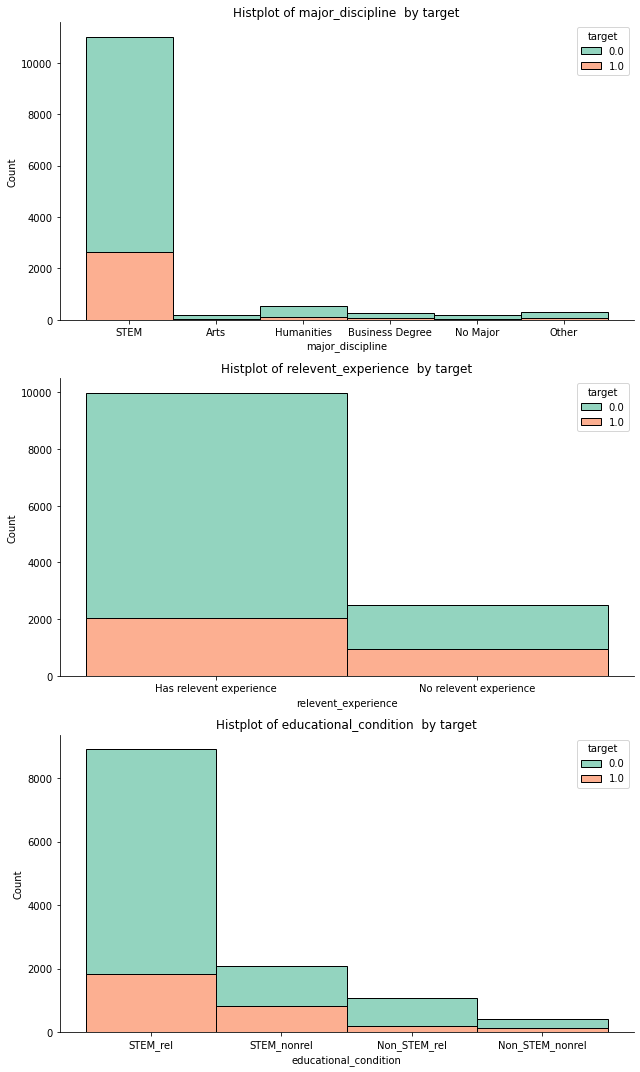

In [ ]:
# Plot the educational condition by target to see the different
plt.figure(figsize=[9,15])
plot=["major_discipline", "relevent_experience", "educational_condition"]
n=1
for f in plot:
    plt.subplot(3,1,n)
    sns.histplot(x=f, hue='target', edgecolor="black", multiple="stack", alpha=0.7, data=df_Clean)
    sns.despine()
    plt.title("Histplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

Through this plot, it is undeniable that candidates with relevant experiecne tend to stay in this company, especially when we compare 'relevent' with 'non_relevent' groups.

##### 2.1.3.1 Educational Condition by training hours

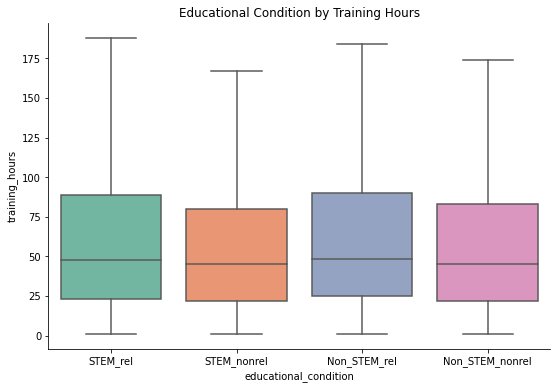

In [ ]:
plt.figure(figsize=[9,6])
sns.boxplot(x="educational_condition", y="training_hours", 
                 data=df_Clean, showfliers = False)
#plt.legend(loc='upper right', title='Target')
sns.despine()
plt.title("Educational Condition by Training Hours");

We are guessing that maybe candidates who are majored in STEM and have relevant experience need less training hours compared with other groups.

However, apparently the result is not like our guessing -- Training hours does not rely on the candidates' educational condition. 

### 2.2 Is it a fact that: the longer the candidate is being trained, the higher chance he/she will stay? How should we adjust the training hours as a HR?

In [ ]:
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(0,51)), "0-50", "Unknown")
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(51,101)), "50-100",df_Clean['training_hours_range'])
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(101,151)), "100-150",df_Clean['training_hours_range'] )
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(151,201)), "150-200",df_Clean['training_hours_range'] )
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(201,251)), "200-250",df_Clean['training_hours_range'] )
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(251,301)), "250-300",df_Clean['training_hours_range'] )
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(301,351)), "300-350",df_Clean['training_hours_range'] )
df_Clean=df_Clean.sort_values('training_hours_range', ascending=True)

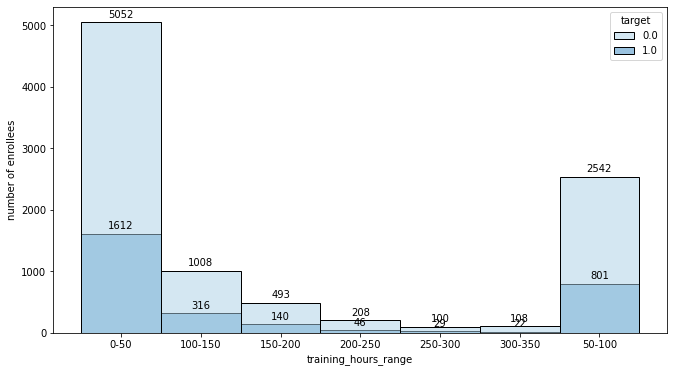

In [ ]:
# How much training hours does the company invest in its future employees? we can plot a histogram of training hours.)
plt.figure(figsize=[11,6])

plots_thrs = sns.histplot(data=df_Clean, x='training_hours_range', hue="target", palette="Blues")

  # Iterrating over the bars one-by-one
for bar in plots_thrs.patches: 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
      plots_thrs.annotate(format(bar.get_height(), 'd'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')

plt.ylabel("number of enrollees")
plt.show()

Based on the hisplot for training hours, we can observe that it's not necessary that the more time the candidate is being trained, the higher chance he/she will stay. From a HR perspective, 50-150hrs training hour range has higher percentage of retention about 76%. It's the ideal range for the employees. 

* 100-150:76.1%
* 50-100: 76.04%

### 2.3 Do people with higher education levels affect the company size and type they work in?

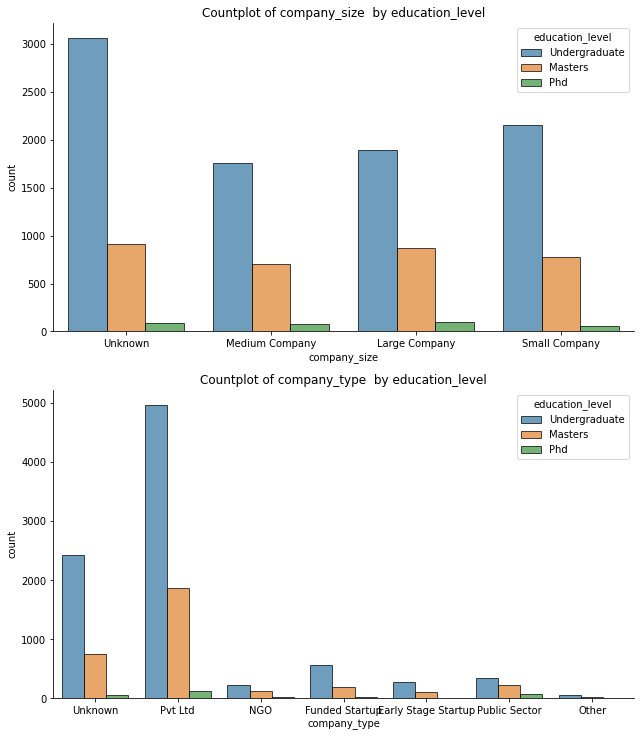

In [ ]:
plt.figure(figsize=[9,15])
categories=["company_size", "company_type"]
n=1
for f in categories:
    plt.subplot(3,1,n)
    sns.countplot(x=f, hue='education_level', edgecolor="black", alpha=0.7, data=df_Clean)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()

* People with different education levels have no difference in choosing company size. 
* Undergraduates candidates favor private company the most.

# 3. Data Preparation for Machine Learning 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

In [ ]:
df_Clean.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target,company_size,cdi_bucket,cat_experience,educational_condition,training_hours_range
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,>20,Unknown,1,36,1.0,Unknown,very_high_human_development,Many Experience,STEM_rel,0-50
10803,24658,city_103,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,No Major,>20,Pvt Ltd,1,26,0.0,Medium Company,very_high_human_development,Many Experience,Non_STEM_rel,0-50
10797,17847,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,4,Pvt Ltd,1,28,0.0,Large Company,medium_human_development,Primary Experience,STEM_rel,0-50
10796,1122,city_46,0.762,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,17,Pvt Ltd,2,27,0.0,Large Company,high_human_development,Many Experience,STEM_rel,0-50
10794,24653,city_160,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,7,Pvt Ltd,1,43,0.0,Unknown,very_high_human_development,Little Experience,STEM_rel,0-50


In [ ]:
# Bucketing the company_size values into categorizes
df_Clean['size'] = np.where(df_Clean['company_size'].isin(['50-99','10-49','<10']), 'Small Company', 'Unknown')
df_Clean['size'] = np.where(df_Clean['company_size'].isin(['100-500','500-999']), 'Medium Company',df_Clean['size'])
df_Clean['size'] = np.where(df_Clean['company_size'].isin(['10000+','1000-4999','5000-9999']), 'Large Company',df_Clean['size'])
sorted_counts=df_Clean['size'].value_counts()

In [ ]:
df_Clean.drop(['company_size'], axis=1, inplace=True)
df_Clean.rename(columns={'size': 'company_size'}, inplace=True)

In [ ]:
df_Clean.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target,cdi_bucket,cat_experience,educational_condition,training_hours_range,company_size
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,>20,Unknown,1,36,1.0,very_high_human_development,Many Experience,STEM_rel,0-50,Unknown
10803,24658,city_103,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,No Major,>20,Pvt Ltd,1,26,0.0,very_high_human_development,Many Experience,Non_STEM_rel,0-50,Unknown
10797,17847,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,4,Pvt Ltd,1,28,0.0,medium_human_development,Primary Experience,STEM_rel,0-50,Unknown
10796,1122,city_46,0.762,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,17,Pvt Ltd,2,27,0.0,high_human_development,Many Experience,STEM_rel,0-50,Unknown
10794,24653,city_160,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,7,Pvt Ltd,1,43,0.0,very_high_human_development,Little Experience,STEM_rel,0-50,Unknown


In [ ]:
df["company_type"].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [ ]:
df_Clean.drop(['company_size'], axis=1, inplace=True)
df_Clean.rename(columns={'size': 'company_size'}, inplace=True)

In [ ]:
df_Clean['company_type'].isin(['Funded Startup','Early Stage Startup'])

0        False
10803    False
10797    False
10796    False
10794    False
         ...  
11445    False
1825     False
11442    False
15634    False
12878    False
Name: company_type, Length: 12477, dtype: bool

In [ ]:
df_Clean['type'] = np.where(df_Clean['company_type'].isin(['Funded Startup','Early Stage Startup']), 'Startup Company', df_Clean['company_type'])

In [ ]:
df_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 12878
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             12477 non-null  int64   
 1   city                    12477 non-null  object  
 2   city_development_index  12477 non-null  float64 
 3   gender                  12477 non-null  object  
 4   relevent_experience     12477 non-null  object  
 5   enrolled_university     12477 non-null  object  
 6   education_level         12477 non-null  object  
 7   major_discipline        12477 non-null  object  
 8   experience              12477 non-null  object  
 9   company_type            12477 non-null  object  
 10  last_new_job            12477 non-null  object  
 11  training_hours          12477 non-null  int64   
 12  target                  12477 non-null  float64 
 13  cdi_bucket              12477 non-null  category
 14  cat_experience        

In [ ]:
df_Clean.drop(['company_type'], axis=1, inplace=True)
df_Clean.rename(columns={'type': 'company_type'}, inplace=True)

In [ ]:
df_Clean.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target,cdi_bucket,cat_experience,educational_condition,training_hours_range,company_type
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,>20,1,36,1.0,very_high_human_development,Many Experience,STEM_rel,0-50,Unknown
10803,24658,city_103,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,No Major,>20,1,26,0.0,very_high_human_development,Many Experience,Non_STEM_rel,0-50,Pvt Ltd
10797,17847,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,4,1,28,0.0,medium_human_development,Primary Experience,STEM_rel,0-50,Pvt Ltd
10796,1122,city_46,0.762,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,17,2,27,0.0,high_human_development,Many Experience,STEM_rel,0-50,Pvt Ltd
10794,24653,city_160,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,7,1,43,0.0,very_high_human_development,Little Experience,STEM_rel,0-50,Pvt Ltd


In [ ]:
df_Clean["last_new_job"].unique()

array(['1', '2', '>4', '4', '3', 'never'], dtype=object)

In [ ]:
df_Clean["last_new_job"] =df_Clean["last_new_job"].replace(to_replace ="never",
                 value =0)
df_Clean["last_new_job"] =df_Clean["last_new_job"].replace(to_replace =">4",
                 value =5)
df_Clean["last_new_job"] = df_Clean["last_new_job"].astype("int64")

In [ ]:
df_Clean["last_new_job"].unique()

array([1, 2, 5, 4, 3, 0])

In [ ]:
df_Clean.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target,cdi_bucket,cat_experience,educational_condition,training_hours_range,company_type
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,>20,1,36,1.0,very_high_human_development,Many Experience,STEM_rel,0-50,Unknown
10803,24658,city_103,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,No Major,>20,1,26,0.0,very_high_human_development,Many Experience,Non_STEM_rel,0-50,Pvt Ltd
10797,17847,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,4,1,28,0.0,medium_human_development,Primary Experience,STEM_rel,0-50,Pvt Ltd
10796,1122,city_46,0.762,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,17,2,27,0.0,high_human_development,Many Experience,STEM_rel,0-50,Pvt Ltd
10794,24653,city_160,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,7,1,43,0.0,very_high_human_development,Little Experience,STEM_rel,0-50,Pvt Ltd


In [ ]:
df_Clean["experience"].unique()

array(['>20', '4', '17', '7', '8', '6', '15', '18', '3', '14', '11', '16',
       '1', '5', '10', '13', '9', '20', '12', '19', '2', '<1'],
      dtype=object)

In [ ]:
df_Clean["experience"].head()

0        >20
10803    >20
10797      4
10796     17
10794      7
Name: experience, dtype: object

In [ ]:
df_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 12878
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             12477 non-null  int64   
 1   city                    12477 non-null  object  
 2   city_development_index  12477 non-null  float64 
 3   gender                  12477 non-null  object  
 4   relevent_experience     12477 non-null  object  
 5   enrolled_university     12477 non-null  object  
 6   education_level         12477 non-null  object  
 7   major_discipline        12477 non-null  object  
 8   experience              12477 non-null  object  
 9   last_new_job            12477 non-null  int64   
 10  training_hours          12477 non-null  int64   
 11  target                  12477 non-null  float64 
 12  cdi_bucket              12477 non-null  category
 13  cat_experience          12477 non-null  object  
 14  educational_condition 

In [ ]:
df_Clean.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target,cdi_bucket,cat_experience,educational_condition,training_hours_range,company_type
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,>20,1,36,1.0,very_high_human_development,Many Experience,STEM_rel,0-50,Unknown
10803,24658,city_103,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,No Major,>20,1,26,0.0,very_high_human_development,Many Experience,Non_STEM_rel,0-50,Pvt Ltd
10797,17847,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,4,1,28,0.0,medium_human_development,Primary Experience,STEM_rel,0-50,Pvt Ltd
10796,1122,city_46,0.762,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,17,2,27,0.0,high_human_development,Many Experience,STEM_rel,0-50,Pvt Ltd
10794,24653,city_160,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,STEM,7,1,43,0.0,very_high_human_development,Little Experience,STEM_rel,0-50,Pvt Ltd


In [ ]:
df_Clean["experience"] =df_Clean["experience"].replace(to_replace =">20",
                 value =21)
df_Clean["experience"] =df_Clean["experience"].replace(to_replace ="<1",
                 value =0)
df_Clean["experience"] = df_Clean["experience"].astype("int64")

In [ ]:
df_Clean["experience"].unique()

array([21,  4, 17,  7,  8,  6, 15, 18,  3, 14, 11, 16,  1,  5, 10, 13,  9,
       20, 12, 19,  2,  0])

In [ ]:
df_Clean["major_discipline"].unique()

array(['STEM', 'No Major', 'Humanities', 'Business Degree', 'Other',
       'Arts'], dtype=object)

In [ ]:
df_Clean['major'] = np.where(df_Clean['major_discipline'].isin(['Arts', 'Humanities', 'Business Degree', 'No Major',
       'Other']), 'Non-STEM', df_Clean['major_discipline'])

In [ ]:
df_Clean['major'].unique()

array(['STEM', 'Non-STEM'], dtype=object)

In [ ]:
df_Clean['major_discipline'].unique()

array(['STEM', 'No Major', 'Humanities', 'Business Degree', 'Other',
       'Arts'], dtype=object)

In [ ]:
df_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 12878
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             12477 non-null  int64   
 1   city                    12477 non-null  object  
 2   city_development_index  12477 non-null  float64 
 3   gender                  12477 non-null  object  
 4   relevent_experience     12477 non-null  object  
 5   enrolled_university     12477 non-null  object  
 6   education_level         12477 non-null  object  
 7   major_discipline        12477 non-null  object  
 8   experience              12477 non-null  int64   
 9   last_new_job            12477 non-null  int64   
 10  training_hours          12477 non-null  int64   
 11  target                  12477 non-null  float64 
 12  cdi_bucket              12477 non-null  category
 13  cat_experience          12477 non-null  object  
 14  educational_condition 

In [ ]:
df_Clean.drop(['major_discipline'], axis=1, inplace=True)


In [ ]:
df_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 12878
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             12477 non-null  int64   
 1   city                    12477 non-null  object  
 2   city_development_index  12477 non-null  float64 
 3   gender                  12477 non-null  object  
 4   relevent_experience     12477 non-null  object  
 5   enrolled_university     12477 non-null  object  
 6   education_level         12477 non-null  object  
 7   experience              12477 non-null  int64   
 8   last_new_job            12477 non-null  int64   
 9   training_hours          12477 non-null  int64   
 10  target                  12477 non-null  float64 
 11  cdi_bucket              12477 non-null  category
 12  cat_experience          12477 non-null  object  
 13  educational_condition   12477 non-null  object  
 14  training_hours_range  

In [ ]:
df_Clean.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target,cdi_bucket,cat_experience,educational_condition,training_hours_range,company_type,major
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,21,1,36,1.0,very_high_human_development,Many Experience,STEM_rel,0-50,Unknown,STEM
10803,24658,city_103,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,21,1,26,0.0,very_high_human_development,Many Experience,Non_STEM_rel,0-50,Pvt Ltd,Non-STEM
10797,17847,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,4,1,28,0.0,medium_human_development,Primary Experience,STEM_rel,0-50,Pvt Ltd,STEM
10796,1122,city_46,0.762,Male,Has relevent experience,no_enrollment,Undergraduate,17,2,27,0.0,high_human_development,Many Experience,STEM_rel,0-50,Pvt Ltd,STEM
10794,24653,city_160,0.920,Male,Has relevent experience,no_enrollment,Undergraduate,7,1,43,0.0,very_high_human_development,Little Experience,STEM_rel,0-50,Pvt Ltd,STEM


In [ ]:
df_Clean["major"].unique()

array(['STEM', 'Non-STEM'], dtype=object)

In [ ]:
df_Clean = pd.get_dummies(df_Clean,columns=["gender", "relevent_experience", "enrolled_university", "education_level", "cdi_bucket","company_type","major"], drop_first = True)

In [ ]:
df_ML = df_Clean.drop(["enrollee_id", "city","cat_experience","educational_condition","training_hours_range"], axis=1)

In [ ]:
df_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 12878
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   enrollee_id                                 12477 non-null  int64  
 1   city                                        12477 non-null  object 
 2   city_development_index                      12477 non-null  float64
 3   experience                                  12477 non-null  int64  
 4   last_new_job                                12477 non-null  int64  
 5   training_hours                              12477 non-null  int64  
 6   target                                      12477 non-null  float64
 7   cat_experience                              12477 non-null  object 
 8   educational_condition                       12477 non-null  object 
 9   training_hours_range                        12477 non-null  object 
 10  gender_Mal

In [ ]:
df_ML.head()

,city_development_index,experience,last_new_job,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,...,education_level_Undergraduate,cdi_bucket_medium_human_development,cdi_bucket_high_human_development,cdi_bucket_very_high_human_development,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Startup Company,company_type_Unknown,major_STEM
0,0.920,21,1,36,1.0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,1
10803,0.920,21,1,26,0.0,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
10797,0.624,4,1,28,0.0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
10796,0.762,17,2,27,0.0,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1
10794,0.920,7,1,43,0.0,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1


Train and Test Dataset Split 

In [ ]:
## Creating a train test split
from sklearn.model_selection import train_test_split
X = df_ML.drop(['target'], axis = 1)
y = df_ML['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 780 )

In [ ]:
X.head()

,city_development_index,experience,last_new_job,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Phd,education_level_Undergraduate,cdi_bucket_medium_human_development,cdi_bucket_high_human_development,cdi_bucket_very_high_human_development,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Startup Company,company_type_Unknown,major_STEM
0,0.920,21,1,36,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1
10803,0.920,21,1,26,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
10797,0.624,4,1,28,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
10796,0.762,17,2,27,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1
10794,0.920,7,1,43,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1


##3.1 Gaussian Naive Bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_train, y_train)                  # 3. fit model to data
y_model = model.predict(X_test)             # 4. predict on new data

In [ ]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_model)

0.7475961538461539

In [ ]:
confusion_matrix(y_test, y_model)

array([[2269,  606],
       [ 339,  530]])

In [ ]:
print(2357/(2357 + 517))
print("Sensitivity")

0.8201113430758524
Sensitivity


In [ ]:
print(501/(501+369))
print("Specificity")

0.5758620689655173
Specificity


In [ ]:
test = X_test.join(y_test).reset_index()
test.join(pd.Series(y_model, name='predicted')).head(20)

,index,city_development_index,experience,last_new_job,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Phd,education_level_Undergraduate,cdi_bucket_medium_human_development,cdi_bucket_high_human_development,cdi_bucket_very_high_human_development,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Startup Company,company_type_Unknown,major_STEM,target,predicted
0,9296,0.878,5,4,69,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0.0,0.0
1,5358,0.512,9,1,68,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0.0,1.0
2,8352,0.698,2,1,10,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,1.0,1.0
3,7679,0.920,21,5,153,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0.0,0.0
4,7855,0.920,15,1,136,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0.0,0.0
5,1533,0.740,21,0,31,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0.0,1.0
6,16677,0.795,5,1,80,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0.0,0.0
7,18739,0.920,4,3,87,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0.0,0.0
8,11548,0.762,13,1,106,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,1.0,0.0
9,14143,0.926,12,1,322,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0.0,0.0


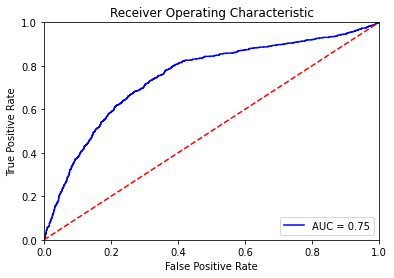

In [ ]:
# creating AUC/ROC graph (code from stackoverflow)
import sklearn.metrics as metrics
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##3.2 Random Forest

In [ ]:
# initiate the model 
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

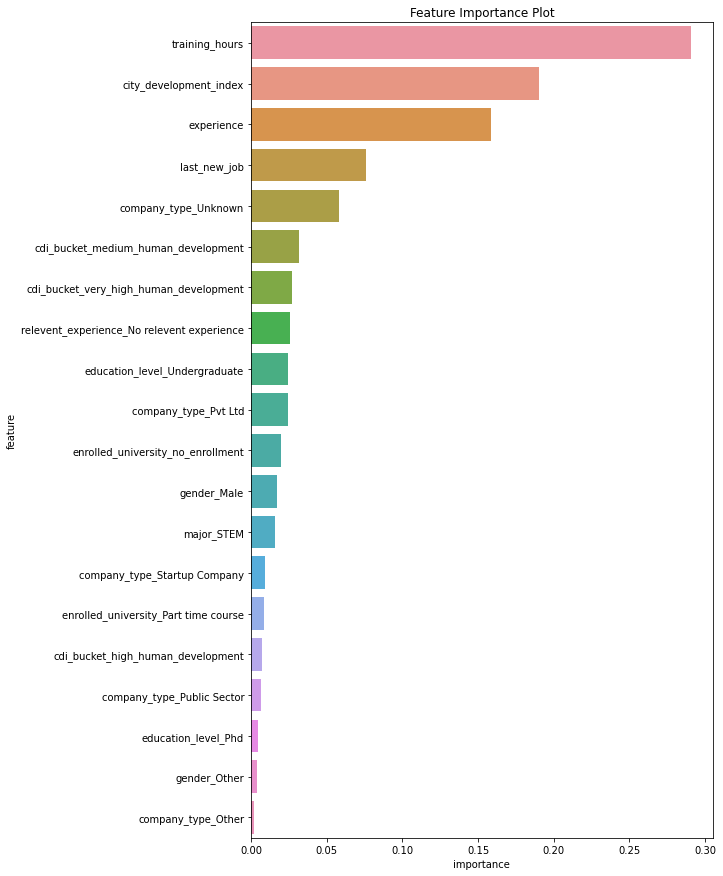

In [ ]:
# explore feature importance
feature_importance = pd.DataFrame({'feature':X.columns, 'importance':rfc.feature_importances_}).sort_values('importance',ascending=False).reset_index().drop(columns='index')
fig, ax = plt.subplots()
fig.set_size_inches(8.27,15)
plt.title('Feature Importance Plot')
sns.barplot(x='importance',y='feature',ax=ax,data=feature_importance[:50])

In [ ]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      2875
         1.0       0.53      0.42      0.47       869

    accuracy                           0.78      3744
   macro avg       0.68      0.65      0.66      3744
weighted avg       0.76      0.78      0.77      3744



In [ ]:
from sklearn.metrics import roc_auc_score
y_pred_rfc = rfc.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_rfc))


0.7681150747986191


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("specificity", specificity, "sensitivity", sensitivity )

specificity 0.888 sensitivity 0.4154200230149597


0.7681150747986191


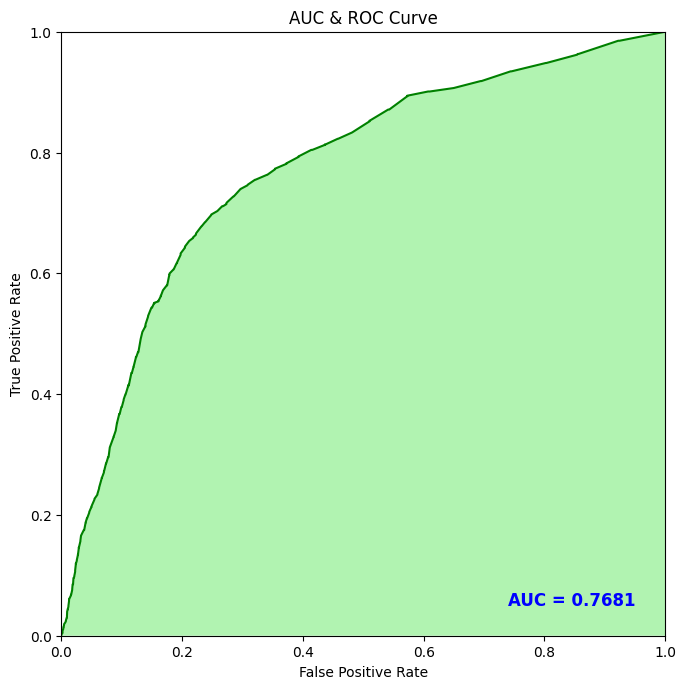

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_rfc)
print(auc)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_rfc)
#print(false_positive_rate,true_positive_rate)
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## 3.3 XGBoost

In [ ]:
def auc_roc_graph(ytest,preds):# creating AUC/ROC graph
  ## Calculating metrics from ytest and predicted value
  fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
  roc_auc = metrics.auc(fpr, tpr)
  ## Plotting AUC-ROC
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

In [ ]:
def train_and_predict(X_train_model, X_test_model, y_train_model, y_test_model, classifier):  ## Function takes in traintest split dataset and ML model - fits & predicts the model, calculates metrics
  ## Training the Model
  classifier.fit(X_train_model, y_train_model)

  ## Predicting the model
  y_model_tp = classifier.predict(X_test_model)

  ## Accuracy score
  a_score = metrics.accuracy_score(y_test_model, y_model_tp)
  print("The Accuracy is {}".format(a_score))

  ## Calculating sensitivity
  TP = sum((y_test_model == 1) & (y_model_tp == 1))
  p = sum((y_test_model == 1))
  TPR = TP/p
  print("The Sensitivity / True Positive Rate (TPR) is {}".format(TPR))

  ## Calculating Specifictiy
  N = sum(y_test_model == 0)
  TN = sum((y_test_model == 0) & (y_model_tp == 0))
  TNR = TN/N
  print("The Specifictiy / TNR  is {}".format(TNR))

  # calculate recall
  recall = metrics.recall_score(y_test_model, y_model_tp, average='binary')
  print('Recall: %.3f' % recall)

  # calculating precision
  precision = metrics.precision_score(y_test_model, y_model_tp, average='binary')
  print('Precision: {}'.format(precision))

  ## Calculating F1 score
  score = metrics.f1_score(y_test_model, y_model_tp, average='binary')
  print('F1-score: {}'.format(score))

  ##Printing the roc_auc
  auc_roc_graph(y_test_model,y_model_tp)

  return [a_score,TPR,TNR, recall, precision,score]

In [ ]:
## Instantiating the XGboost model

XgB = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

The Accuracy is 0.8036858974358975
The Sensitivity / True Positive Rate (TPR) is 0.48331415420023016
The Specifictiy / TNR  is 0.9005217391304348
Recall: 0.483
Precision: 0.5949008498583569
F1-score: 0.5333333333333333


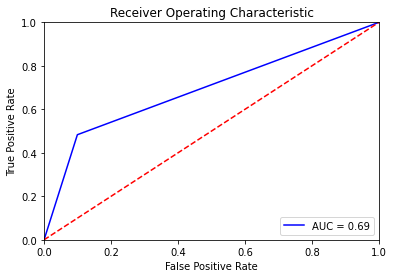

In [ ]:
xg_metrics = train_and_predict(X_train, X_test, y_train, y_test,XgB)


## 3.4 Logistic Model

In [ ]:
df_ML.groupby('target').size()/df_ML.shape[0]

target
0.0    0.762283
1.0    0.237717
dtype: float64

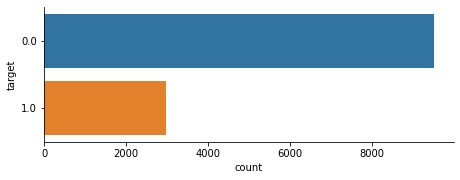

In [ ]:
sns.catplot(y="target", kind="count", data=df_ML, height=2.6, aspect=2.5);

We see that the target variable is very unbalanced

In [ ]:
def train_and_predict(X_train_model, X_test_model, y_train_model, y_test_model, classifier):  ## Function takes in traintest split dataset and ML model - fits & predicts the model, calculates metrics
  ## Training the Model
  classifier.fit(X_train_model, y_train_model)
  ## Predicting the model
  y_model_tp = classifier.predict(X_test_model)
  ## Accuracy score
  a_score = accuracy_score(y_test_model, y_model_tp)
  print("The Accuracy is {}".format(a_score))
  ## Calculating sensitivity
  TP = sum((y_test_model == 1) & (y_model_tp == 1))
  p = sum((y_test_model == 1))
  TPR = TP/p
  print("The Sensitivity / True Positive Rate (TPR) is {}".format(TPR))
  ## Calculating Specifictiy
  N = sum(y_test_model == 0)
  TN = sum((y_test_model == 0) & (y_model_tp == 0))
  TNR = TN/N
  print("The Specifictiy / TNR  is {}".format(TNR))
  return [a_score,TPR,TNR]

In [ ]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_model = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Acurracy score:",accuracy_score(y_test, y_model))

Acurracy score: 0.7769764957264957


In [ ]:
#Sensitivity
P = sum(y_test == 1)
P

869

In [ ]:
TP = sum((y_test == 1) & (y_model == 1))
TP

170

In [ ]:
print("Sensitivity:",TP/P)

Sensitivity: 0.1956271576524741


In [ ]:
#Specificity
N = sum(y_test == 0)
N

2875

In [ ]:
TN = sum((y_test == 0) & (y_model == 0))
TN

2739

In [ ]:
print("Specificity:",TN/N)

Specificity: 0.952695652173913


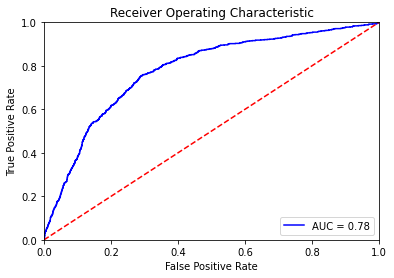

In [ ]:
# creating AUC/ROC graph
import sklearn.metrics as metrics
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 3.5 Multilayer Perceptron Classifier

* Rationale: The most typical MLP includes three layers: an input layer, a hidden layer and an output layer. The different layers of the MLP neural network are fully connected (full connection means: any neuron in the upper layer and all the neurons in the next layer). Neurons are connected)

* ReLU is a relatively popular activation function recently. When the input signal is less than 0, the output is 0; when the input signal is greater than 0, the output is equal to the input; the specific activation function used depends on the specific situation.

In [ ]:
fit_MLP = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
fit_MLP.predict_proba(X_test[:1])

array([[0.8507274, 0.1492726]])

In [ ]:
fit_MLP.predict(X_test)

array([0., 0., 1., ..., 0., 0., 1.])

In [ ]:
fit_MLP.score(X_test, y_test)

0.7751068376068376

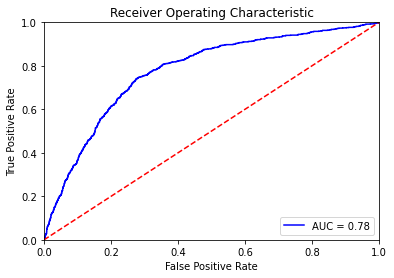

In [ ]:
# creating AUC/ROC graph
import sklearn.metrics as metrics
probs = fit_MLP.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Conclusion 

We are thinking from the perspective of HRs. Based on the EDA we conducted, we have several suggestions for HR regarding the optimal candidates selection.

* Hint 1: Gender seems to have no impact on candidates' decision. It is paramount to note that most candidates with relevant experience are male.

* Hint 2: In general, the candidates with higher qualifications belong to cities with higher CDI. However, candidates from cities with lower and medium development index are more likely to look for a change.

* Hint 3: Most of the enrollees major in STEM, which is reasonable because the company is hiring data scientists. However, the major discipline and having relevant experience or not do not affect the training hours -- which are related to the budget of the company. So HRs can lower down their "major bias". They all need training!

* Hint 4: STEM major, Masters and candidates with more experience joining this program will tend to stay.

* Hint 5: When recruiting candidates to join this program, HRs can turn to candidates with longer gap beween last job and new one. However, not the ones who never change their job, those may experience nostalgia and don't want any change.

* Hint 6: Starting from the company size & type criteria, candidates from private limited company type and small or medium company size tend to stay.

* Hint 7: Considering the training hours which is highly related to the budget, candidates from small companies tend to have higher training hours compared to the others.

* Hint 8: 50-150hrs training hour range has higher percentage of retention, about 76%. This is the ideal training hour range for the employees.


# Machine Learning

* After plotting 5 different machine models, we observed that Logistic Model and Multilayer Perceptron Classifier has the best AUC score of 0.78.

* The feature importance chart shows that training hours, city development and candidates' years of experience play a vital role in predicting whether the candidates stay or leave the company after training. 

* Education background, gender, and company type/size acutally shows less significance in this problem. 
